In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
threshold = 0.5
label = True # Fasle for correlation without label
binary_classify = True # False for multi-classify
data_path = "../data/data.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data = data.drop(columns=['No.', 'Full Name', 'Sample ID', 'Birth year', 'Gender'])

In [5]:
if not binary_classify:
    data = data.drop(columns=['Binary-label'])
data = data.drop(columns=['Multi-label'])

In [6]:
# select all columns of numeric types (including the label column if applicable)
num_col = list(data.select_dtypes(include='number').columns)

if label:
    # compute pairwise correlation of columns
    corr_matrix = data[num_col].corr()

    # corr. value between X and Y, where X = 'label' and Y is an arbitrary column
    corr_xy_given_x_is_label = corr_matrix['Binary-label']

    most_corr_values = corr_xy_given_x_is_label[abs(corr_xy_given_x_is_label) > threshold]

    multi_cols = most_corr_values.index
else:
    num_col.remove('Binary-label')

    corr_matrix = (data[num_col].corr())

    corr_features_mean = corr_matrix.mean(axis=0)

    most_corr_values = corr_features_mean[(corr_features_mean) > threshold]

    multi_cols = most_corr_values.index

    multi_cols = pd.Index(list(multi_cols) + ['Binary-label'])


In [7]:
len(multi_cols)

12

In [8]:
multi_cols

Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8', 'D2_Lympho',
       'D2_Mono', 'D3_Lympho', 'D3_Q1_ naive', 'D3_Q1_ memory',
       'D3_Q1_ CD21 low', 'D6_Lympho', 'Binary-label'],
      dtype='object')

In [9]:
data_selected = data[multi_cols]

{'whiskers': [<matplotlib.lines.Line2D at 0x209b5337fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x209b5358d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x209b5337e48>,
 'medians': [<matplotlib.lines.Line2D at 0x209b5365f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x209b5365f08>,
 'means': []}

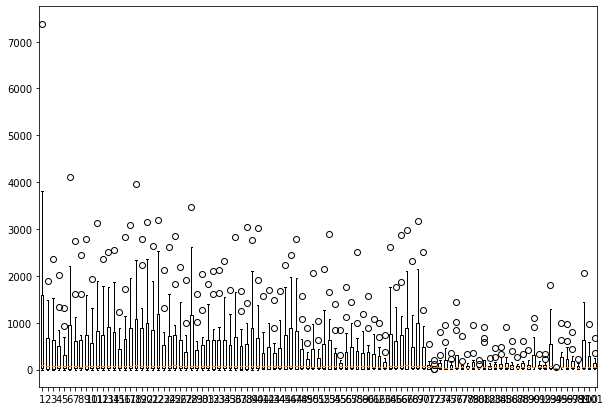

In [10]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(data_selected)

In [11]:
data_selected_melt = pd.melt(data_selected, id_vars="Binary-label",
               var_name="features",
               value_name="value")

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.1% of the points 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

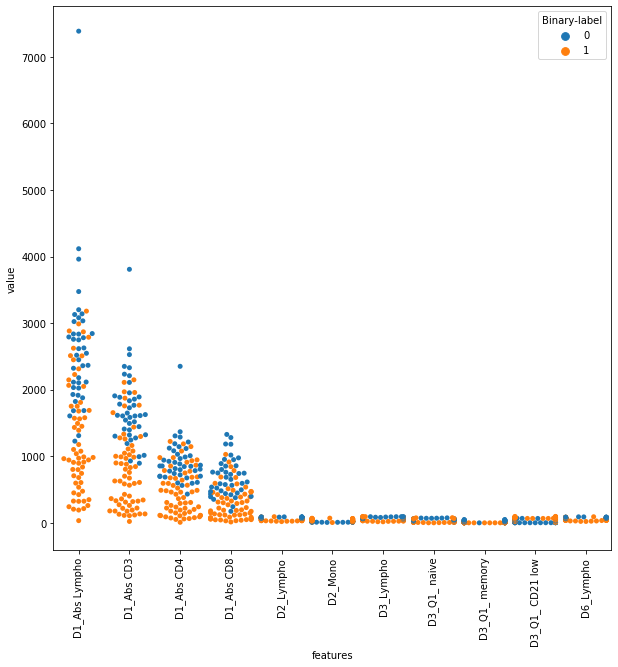

In [12]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_selected_melt)

plt.xticks(rotation=90)

In [18]:
multi_cols_small = multi_cols.drop(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8'])
multi_cols_small

Index(['D2_Lympho', 'D2_Mono', 'D3_Lympho', 'D3_Q1_ naive', 'D3_Q1_ memory',
       'D3_Q1_ CD21 low', 'D6_Lympho', 'Binary-label'],
      dtype='object')

In [25]:
data_selected_small = data[multi_cols_small]
data_selected_large = data[pd.Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8','Binary-label'])]

In [26]:
data_selected_small_melt = pd.melt(data_selected_small, id_vars="Binary-label",
               var_name="features",
               value_name="value")
data_selected_large_melt = pd.melt(data_selected_large, id_vars="Binary-label",
               var_name="features",
               value_name="value")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

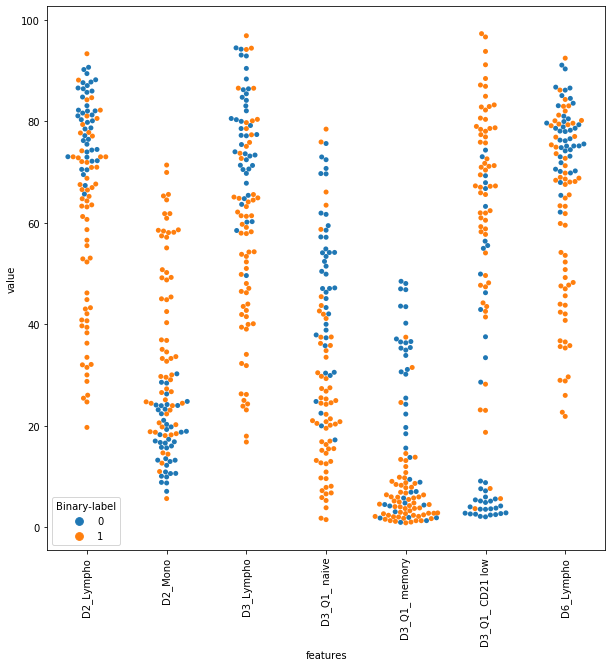

In [17]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_selected_small_melt)

plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

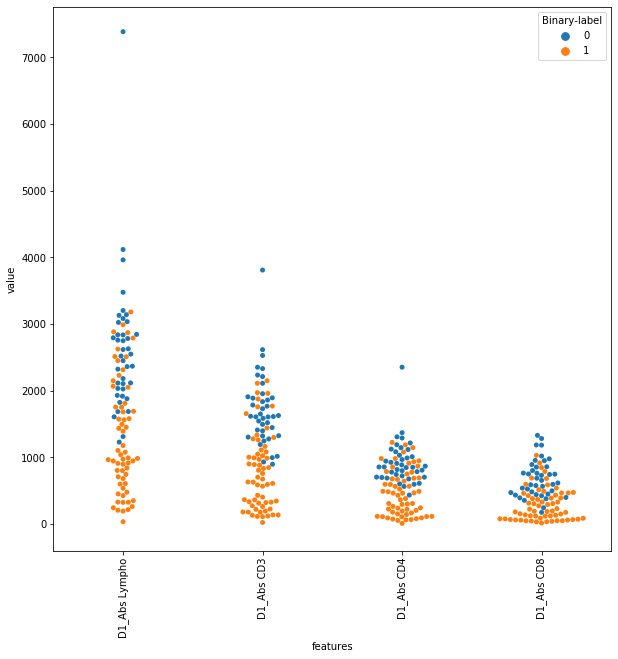

In [27]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_selected_large_melt)

plt.xticks(rotation=90)

In [13]:
corr_matrix.style.background_gradient()

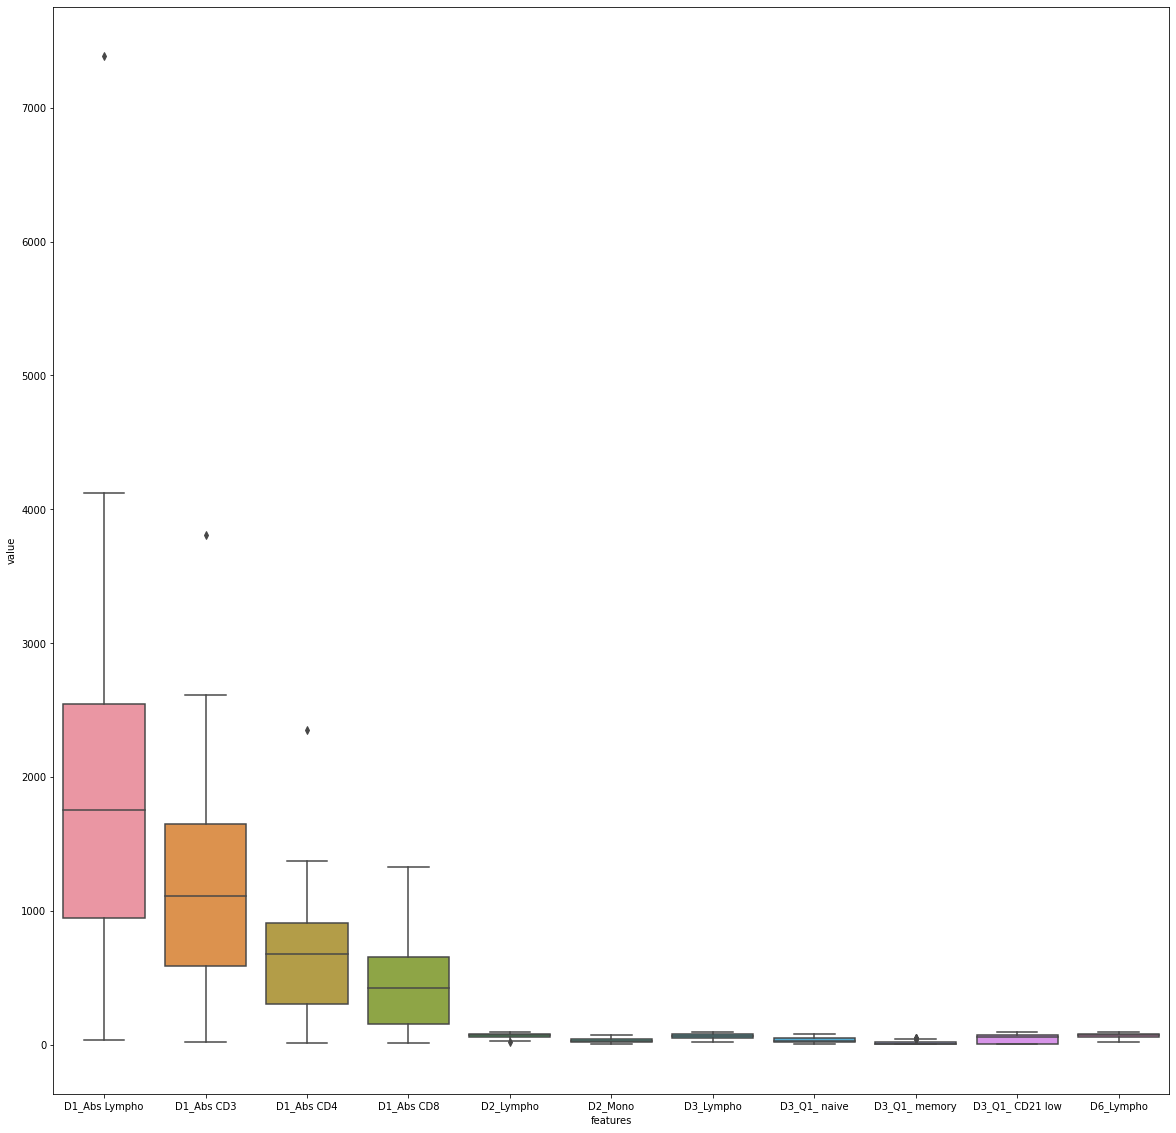

In [20]:
plt.figure(figsize=(20,20))
sns.boxplot(x='features', y='value', data=data)
plt.show()